In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('C:/Users/bbharti/Desktop/Learn Python/Udemy/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S32_L187/1.01. Simple linear regression.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
y = data['GPA']
x = data['SAT']

In [6]:
x.shape

(84,)

In [7]:
y.shape

(84,)

In [8]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.score(x_matrix,y)

0.40600391479679765

### formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [12]:
x_matrix.shape

(84, 1)

In [13]:
r2 = reg.score(x_matrix,y)

n = x_matrix.shape[0]

p = x_matrix.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2

0.3987600600991976

In [14]:
from sklearn.feature_selection import f_regression

In [15]:
f_regression(x_matrix,y)

(array([56.04804786]), array([7.19951844e-11]))

In [16]:
p_values = f_regression(x_matrix,y)[1]
p_values.round(3)

array([0.])

Creating a Summary Table

In [17]:
reg_summary = pd.DataFrame(data = ['SAT'], columns=['Features'])
reg_summary

,Features
0,SAT


In [18]:
reg_summary['coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [19]:
reg_summary

,Features,coefficients,p-values
0,SAT,0.001656,0.0


# Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(x_matrix)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
x_scaled = scaler.transform(x_matrix)

In [23]:
x_scaled

array([[-1.26338288],
       [-1.74458431],
       [-0.82067757],
       [-1.54247971],
       [-1.46548748],
       [-1.68684014],
       [-0.78218146],
       [-0.78218146],
       [-0.51270866],
       [ 0.04548499],
       [-1.06127829],
       [-0.67631715],
       [-1.06127829],
       [-1.28263094],
       [-0.6955652 ],
       [ 0.25721362],
       [-0.86879772],
       [-1.64834403],
       [-0.03150724],
       [-0.57045283],
       [-0.81105355],
       [-1.18639066],
       [-1.75420834],
       [-1.52323165],
       [ 1.23886453],
       [-0.18549169],
       [-0.5608288 ],
       [-0.23361183],
       [ 1.68156984],
       [-0.4934606 ],
       [-0.73406132],
       [ 0.85390339],
       [-0.67631715],
       [ 0.09360513],
       [ 0.33420585],
       [ 0.03586096],
       [-0.35872421],
       [ 1.04638396],
       [-0.65706909],
       [-0.13737155],
       [ 0.18984542],
       [ 0.04548499],
       [ 1.1618723 ],
       [-1.37887123],
       [ 1.39284898],
       [ 0

In [24]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
reg.coef_

array([0.1720369])

In [26]:
reg.intercept_

3.330238095238095

In [27]:
reg_summary = pd.DataFrame([['Bias'],['SAT']], columns = ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0]

In [28]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.172037


In [29]:
new_data = pd.DataFrame(data=[[1700],[1800]],columns=['SAT'])
new_data

,SAT
0,1700
1,1800


In [30]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928],
       [-0.43571643]])

In [31]:
reg.predict(new_data_scaled)

array([3.08970998, 3.25527879])

Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
a = np.arange(1,101)
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [34]:
b = np.arange(501,601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

In [35]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, shuffle=True, random_state=42)

In [36]:
a_train.shape, a_test.shape

((80,), (20,))

In [37]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [38]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [39]:
b_train

array([556, 589, 527, 543, 570, 516, 541, 597, 510, 573, 512, 548, 586,
       529, 594, 506, 567, 566, 536, 517, 550, 535, 508, 596, 528, 520,
       582, 526, 563, 514, 525, 504, 518, 539, 509, 579, 507, 565, 537,
       590, 557, 600, 555, 544, 551, 568, 547, 569, 562, 598, 580, 542,
       559, 549, 599, 558, 576, 533, 595, 560, 564, 585, 538, 530, 502,
       553, 522, 503, 524, 588, 592, 575, 587, 583, 521, 561, 572, 515,
       593, 552])

In [40]:
b_test

array([584, 554, 571, 546, 545, 540, 523, 581, 511, 501, 519, 531, 574,
       534, 591, 505, 577, 578, 513, 532])

In [42]:
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [43]:
reg.predict(new_data)

array([302.67444781, 306.11518585])

In [44]:
new_data['Predicted_GPA'] = reg.predict(new_data)

In [45]:
new_data

,SAT,Predicted_GPA
0,1740,302.674448
1,1760,306.115186


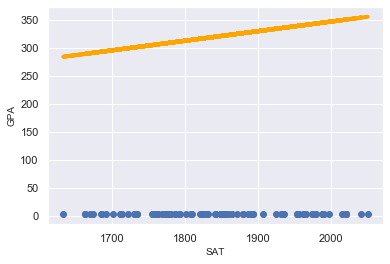

In [46]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4, c='orange', label= 'reg line')
plt.xlabel('SAT',fontsize=10)
plt.ylabel('GPA',fontsize=10)
plt.show()

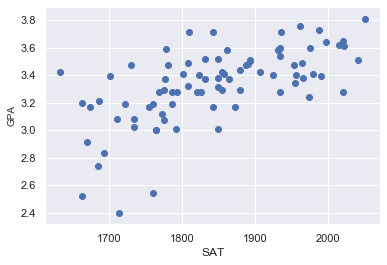

In [47]:
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA',fontsize=10)
plt.show()

In [48]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit() #determine smallest error (least sqaure error)
results.summary()

NameError: name 'x1' is not defined

# Real life example

In [49]:
raw_data= pd.read_csv('C:/Users/bbharti/Desktop/Learn Python/Udemy/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S35_L226/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [52]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [53]:
data = raw_data.drop(['Model'],axis=1) #Model Has 312 Unique Values
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [54]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [55]:
data_no_nv = data.dropna(axis=0)
data_no_nv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [56]:
data_no_nv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


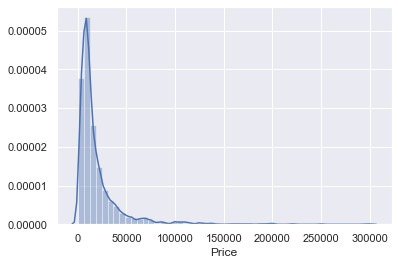

In [57]:
sns.distplot(data_no_nv['Price'])

In [64]:
q=data_no_nv['Price'].quantile(0.97)
data_1 = data_no_nv[data_no_nv['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3904,3904.000000,3904,3904.000000,3904.000000,3904,3904,3904.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1509,NaN,NaN,1790,3533,NaN
mean,NaN,16082.648299,NaN,168.296363,2.730789,NaN,NaN,2006.108607
std,NaN,14520.658287,NaN,101.330483,5.004271,NaN,NaN,6.611815
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,97.750000,1.800000,NaN,NaN,2002.000000
50%,NaN,11000.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20300.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000


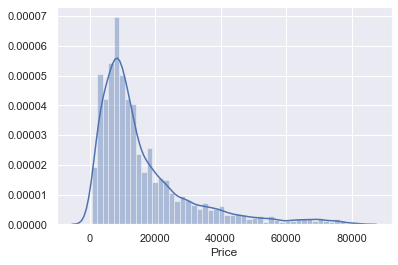

In [65]:
sns.distplot(data_1['Price'])

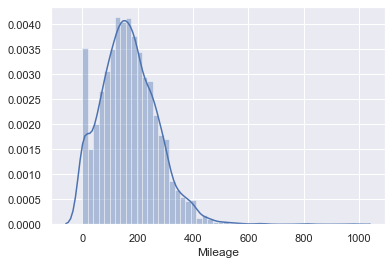

In [66]:
sns.distplot(data_1['Mileage'])

In [74]:
q= data_1['Mileage'].quantile(0.995)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3884,3884.000000,3884,3884.000000,3884.000000,3884,3884,3884.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,872,NaN,1503,NaN,NaN,1774,3513,NaN
mean,NaN,16104.855551,NaN,166.111483,2.732827,NaN,NaN,2006.144696
std,NaN,14506.982956,NaN,96.459696,5.016820,NaN,NaN,6.588424
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,97.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11100.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20362.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


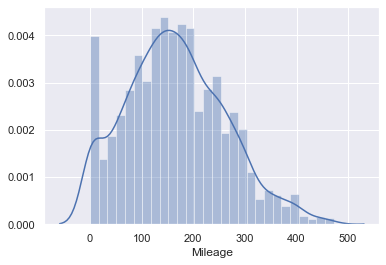

In [75]:
sns.distplot(data_2['Mileage'])

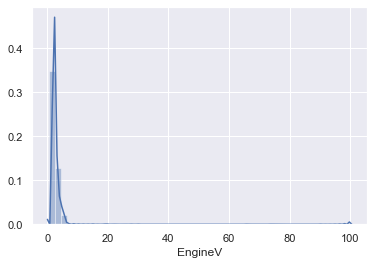

In [76]:
sns.distplot(data_2['EngineV'])

In [77]:
data_3 = data_2[data_2['EngineV']<6.6]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3862,3862.000000,3862,3862.000000,3862.000000,3862,3862,3862.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1492,NaN,NaN,1767,3497,NaN
mean,NaN,16154.358612,NaN,165.930088,2.424953,NaN,NaN,2006.160021
std,NaN,14528.322221,NaN,96.500767,0.939827,NaN,NaN,6.588058
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6912.500000,NaN,97.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11200.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20494.385000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


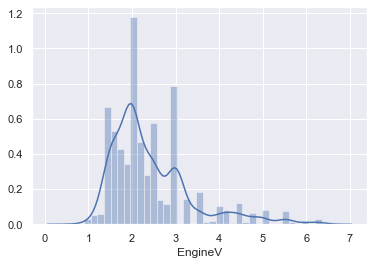

In [78]:
sns.distplot(data_3['EngineV'])

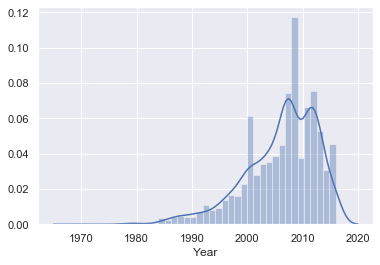

In [79]:
sns.distplot(data_3['Year'])

In [89]:
q = data_3['Year'].quantile(0.003)
data_4 = data_3[data_3['Year']>q]
data_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3850,3850.000000,3850,3850.000000,3850.000000,3850,3850,3850.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,865,NaN,1483,NaN,NaN,1766,3485,NaN
mean,NaN,16187.550704,NaN,165.941818,2.425551,NaN,NaN,2006.244156
std,NaN,14529.861127,NaN,96.379919,0.940371,NaN,NaN,6.420376
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1984.000000
25%,NaN,6992.250000,NaN,97.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11225.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


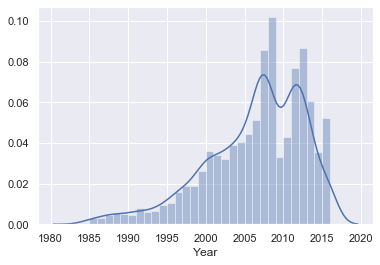

In [90]:
sns.distplot(data_4['Year'])

In [91]:
data_4.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011


In [92]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
5,BMW,6100.0,sedan,438,2.0,Gas,yes,1997
6,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
7,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
8,Volkswagen,1400.0,other,212,1.8,Gas,no,1999
9,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011


In [93]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3850,3850.000000,3850,3850.000000,3850.000000,3850,3850,3850.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,865,NaN,1483,NaN,NaN,1766,3485,NaN
mean,NaN,16187.550704,NaN,165.941818,2.425551,NaN,NaN,2006.244156
std,NaN,14529.861127,NaN,96.379919,0.940371,NaN,NaN,6.420376
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1984.000000
25%,NaN,6992.250000,NaN,97.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11225.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


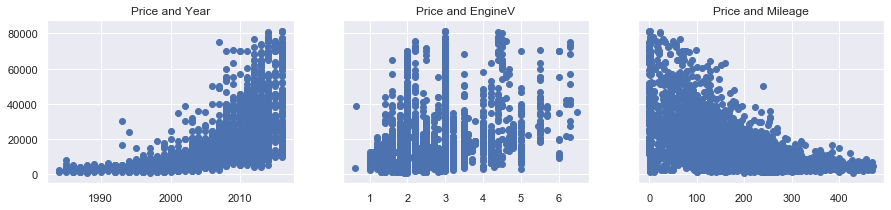

In [94]:
a,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [95]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price']= log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3845,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3846,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3847,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3848,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


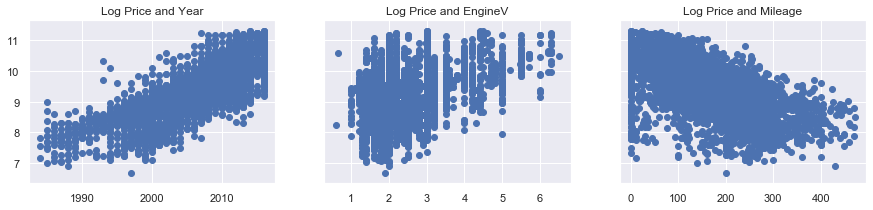

In [96]:
a,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [97]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif
#vif<5 is prefectly fine but year is definetly not ok.

,VIF,features
0,3.941059,Mileage
1,10.265665,Year
2,7.662199,EngineV


In [103]:
data_no_multicollinearity = data_cleaned.drop('Year', axis=1)
data_no_multicollinearity.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3850,3850,3850.000000,3850.000000,3850,3850,3850.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,865,1483,NaN,NaN,1766,3485,NaN
mean,NaN,NaN,165.941818,2.425551,NaN,NaN,9.348462
std,NaN,NaN,96.379919,0.940371,NaN,NaN,0.843774
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,97.000000,1.800000,NaN,NaN,8.852558
50%,NaN,NaN,160.000000,2.200000,NaN,NaN,9.325896
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,9.928180


In [104]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [108]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [112]:
variables = data_with_dummies[['Mileage', 'EngineV', 'Brand_BMW','Brand_Mercedes-Benz',
                               'Brand_Mitsubishi', 'Brand_Renault','Brand_Toyota', 'Brand_Volkswagen',
                               'Body_hatch', 'Body_other','Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
                               'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif

,VIF,features
0,4.594723,Mileage
1,7.800390,EngineV
2,2.288500,Brand_BMW
3,2.817702,Brand_Mercedes-Benz
4,1.641172,Brand_Mitsubishi
5,2.101757,Brand_Renault
6,2.146371,Brand_Toyota
7,2.886658,Brand_Volkswagen
8,1.499621,Body_hatch
9,1.556000,Body_other


In [113]:
data_with_dummies = data_with_dummies.drop("Registration_yes", axis=1)

In [117]:
variables = data_with_dummies[['Mileage', 'EngineV', 'Brand_BMW','Brand_Mercedes-Benz',
                               'Brand_Mitsubishi', 'Brand_Renault','Brand_Toyota', 'Brand_Volkswagen',
                               'Body_hatch', 'Body_other','Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
                               'Engine Type_Other', 'Engine Type_Petrol']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif

,VIF,features
0,4.571558,Mileage
1,6.311999,EngineV
2,2.177057,Brand_BMW
3,2.651330,Brand_Mercedes-Benz
4,1.470817,Brand_Mitsubishi
5,1.816686,Brand_Renault
6,1.934576,Brand_Toyota
7,2.475825,Brand_Volkswagen
8,1.468790,Body_hatch
9,1.515027,Body_other


In [118]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW','Brand_Mercedes-Benz',
        'Brand_Mitsubishi', 'Brand_Renault','Brand_Toyota', 'Brand_Volkswagen', 
        'Body_hatch', 'Body_other','Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
        'Engine Type_Other', 'Engine Type_Petrol']

In [119]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [120]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [125]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 1.15244554, -0.45259381,  2.28247178, ..., -0.42286168,
        -0.16413567,  1.32361841],
       [ 2.70898849,  0.50459995, -0.43812152, ..., -0.42286168,
        -0.16413567, -0.75550475],
       [ 1.99297873,  2.73805207, -0.43812152, ...,  2.36483948,
        -0.16413567, -0.75550475],
       ...,
       [-1.7115935 ,  1.14272913,  2.28247178, ..., -0.42286168,
        -0.16413567,  1.32361841],
       [ 0.29115843, -0.45259381,  2.28247178, ..., -0.42286168,
        -0.16413567,  1.32361841],
       [-0.43522828, -0.45259381, -0.43812152, ..., -0.42286168,
        -0.16413567, -0.75550475]])

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [127]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
y_hat=reg.predict(x_train)

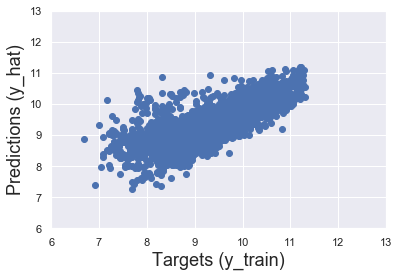

In [129]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

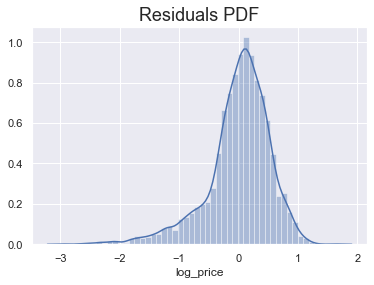

In [130]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [131]:
reg.score(x_train, y_train)

0.5976519011828846

In [132]:
reg.intercept_

9.349675020329506

In [133]:
reg.coef_

array([-0.49272299,  0.22707041,  0.03563746,  0.02792758, -0.10267432,
       -0.11544952, -0.00643602, -0.02292009, -0.17628005, -0.08531025,
       -0.22487236, -0.1542365 , -0.1261894 , -0.07133647, -0.02625852,
       -0.079565  ])

In [134]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.492723
1,EngineV,0.227070
2,Brand_BMW,0.035637
3,Brand_Mercedes-Benz,0.027928
4,Brand_Mitsubishi,-0.102674
5,Brand_Renault,-0.115450
6,Brand_Toyota,-0.006436
7,Brand_Volkswagen,-0.022920
8,Body_hatch,-0.176280
9,Body_other,-0.085310


In [135]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [136]:
y_hat_test = reg.predict(x_test)

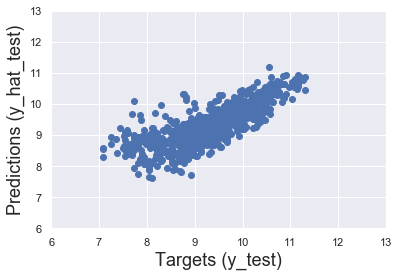

In [137]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [138]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_pf.head()

,Prediction
0,71652.356603
1,8070.658388
2,12833.030304
3,28952.031847
4,7560.067199


In [139]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,71652.356603,NaN
1,8070.658388,7900.0
2,12833.030304,NaN
3,28952.031847,NaN
4,7560.067199,NaN


In [140]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    10.558414
1     8.853665
2     9.464983
3     9.510445
4     9.384294
Name: log_price, dtype: float64

In [141]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,71652.356603,38500.0
1,8070.658388,7000.0
2,12833.030304,12900.0
3,28952.031847,13500.0
4,7560.067199,11900.0


In [142]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [143]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,71652.356603,38500.0,-33152.356603,86.110017
1,8070.658388,7000.0,-1070.658388,15.295120
2,12833.030304,12900.0,66.969696,0.519145
3,28952.031847,13500.0,-15452.031847,114.459495
4,7560.067199,11900.0,4339.932801,36.470024
...,...,...,...,...
765,3961.070092,1180.0,-2781.070092,235.683906
766,4517.462851,7200.0,2682.537149,37.257460
767,21304.521473,21500.0,195.478527,0.909202
768,14329.238108,16500.0,2170.761892,13.156133


In [144]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,770.000000,770.000000,770.000000,770.000000
mean,13616.454852,15288.688701,1672.233850,47.911175
std,9900.220357,13692.726260,7554.264366,76.235983
min,2039.140281,1180.000000,-33152.356603,0.029511
25%,7184.462350,6724.750000,-2237.915226,12.909152
50%,10470.624653,10937.105000,673.493368,27.281407
75%,16897.361278,19150.000000,3883.751066,48.019647
max,71652.356603,81500.000000,46875.030197,937.875339


In [145]:
pd.options.display.max_rows=999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
539,22493.36,22500.00,6.64,0.03
48,15011.23,15000.00,-11.23,0.07
620,10014.98,10000.00,-14.98,0.15
117,8876.38,8900.00,23.62,0.27
231,7623.51,7600.00,-23.51,0.31
741,12457.64,12500.00,42.36,0.34
453,15845.15,15900.00,54.85,0.34
462,45660.72,45500.00,-160.72,0.35
485,40289.79,40500.00,210.21,0.52
2,12833.03,12900.00,66.97,0.52
